# PyTorch Workflow
Let's explore an example PyTorch and end to end workflow.
Resources:
* Ground trth notebook-https://github.com/mrdbourke/pytorch-deep-learning.git
* Book version of notebook -https://www.learnpytorch.io/01pytorch workflow/




In [135]:
what_were_covering={
                    1: "data(prepare and load)",
                    2: "build model",
                    3: "fitting the model to data (training)",
                    4: "making predictions and evalating a model(inference)",
                    5: "saving and loading a model",
                    6: "putting it all together"}
print(what_were_covering)


{1: 'data(prepare and load)', 2: 'build model', 3: 'fitting the model to data (training)', 4: 'making predictions and evalating a model(inference)', 5: 'saving and loading a model', 6: 'putting it all together'}


In [136]:
import torch
from torch import nn #nn contains all of PyTorch basic building blocks of neural netwroks
import matplotlib.pyplot as plt

 #checl PyTorch version
torch.__version__

'2.5.1+cu121'

## 1.Data (preparing and loading)
 * Excel spreadsheet
 * Images of any kind
 * Videos (Youtube has lots of data...)
 * Audio like songs or podcasts
 * DNA
 * Text

Machine learning is a game of two part
  1. Get data into numerical representations.
  2. Build a model to learn patterns in that numerical representations.

To showcase this ,let's create some *known* data using the linear regression formula.
We'll use a linear regression formula to make a straight line with knows parameters.

In [137]:
#Create *known* parameters
weight=0.7
bias=0.3
#Create
start =0
end=1
step=0.02
X=torch.arange(start,end,step).unsqueeze(dim=1)
y=weight*X+bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

### Splitting the data into training and test sets(one of the most important concepts in machine learing in general)

Let's create a training and test set with our data .

In [138]:
# Create a train/test split
train_split=int(0.8*len(X))
X_train,y_train=X[:train_split],y[:train_split]
X_test,y_test=X[train_split:], y[train_split:]
len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

How might we better visualize our data?

This is where the data explore's motto comes in!

"Visualize ,visualize,visualize!"


In [139]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  plots training data,test data and compares predictions."""
  plt.figure(figsize=(10,7))
  #Plot training data in blue
  plt.scatter(train_data,train_labels,c="b",s=4,label="Training_data")
  #Plot test data in green
  plt.scatter(test_data,test_labels,c="g",s=4,label="Testing data")
  #Are there predictions?
  if predictions is not None:
    #Plot the predictions if they exist
    plt.scatter(test_data,predictions,c="r",s=4,label="Predictions")
  #show the legend
  plt.legend(prop={"size":14});



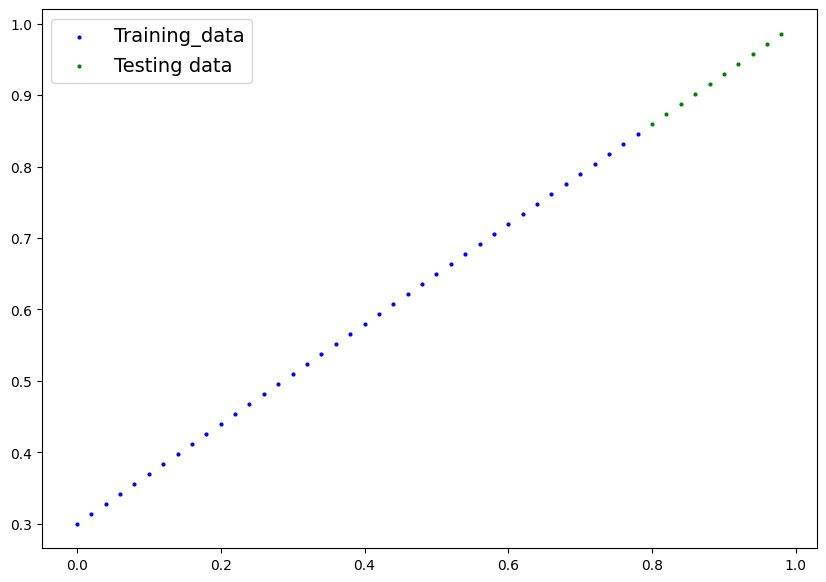

In [140]:
plot_predictions();


## 2.Build model
our first PyTorch model!
This is very exciting....let's do it
What our model does:
* Start with random values(weight & bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias values we used to create the data)

How does it do so?

Through two main algorithms:

1.Gradient descent

2.Back propogation

In [141]:
from torch import nn
#Create linear regression model class
class LinearRegressionModel(nn.Module):#<-almost everything in PyTorch model
  def __init__(self):
   super().__init__()
   self.weights=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
   self.bias=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
   #Forward method to define the computation in the model
  def forward(self,x:torch.Tensor)->torch.Tensor:#<-"x" is the input data
   return self.weights*x+self.bias# this is the linear regression formula


##PyTorch model building essentials
* torch.nn-contains all of the buildings for computational graphs(a neural networks can be considered a computational graphs)
* torch.nn.Parameter-what parameters should or model try and learn ,often PyTorch layer from torch.nn will set these for us
* torch.optim-this where the optimizers in PyTorch live,they will help with gradient descent
* def forward()-All nn.Module subclasses require you to overwrite forward(),this method defines what happens in the forward computation

### Checking the content of out PyTorch model
Now we've created a model,let's see what's inside...

So we can check our model parameters or what's inside our model using .parameters().

In [142]:
#Create a random seed
torch.manual_seed(42)
#Create an instance of the model(this is a subclass of nn.Module)
model_0=LinearRegressionModel()
#Check out the parameters
list(model_0.parameters())


[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [143]:
#List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [144]:
weight,bias

(0.7, 0.3)

### Making predictions using 'torch.inference_mode()
To check our model's predictive power ,let's see how well it predicts y_test based on x_test.

When we pass data through our model,it's going to run it through the forward() method.


In [145]:
X_test,y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [146]:
#Make predictions with model
with torch.inference_mode():
  y_preds=model_0(X_test)
 #You can also do something similar with torch.no_grad() , however,torch.inference_mode() is preferred
with torch.no_grad():
  y_preds=model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

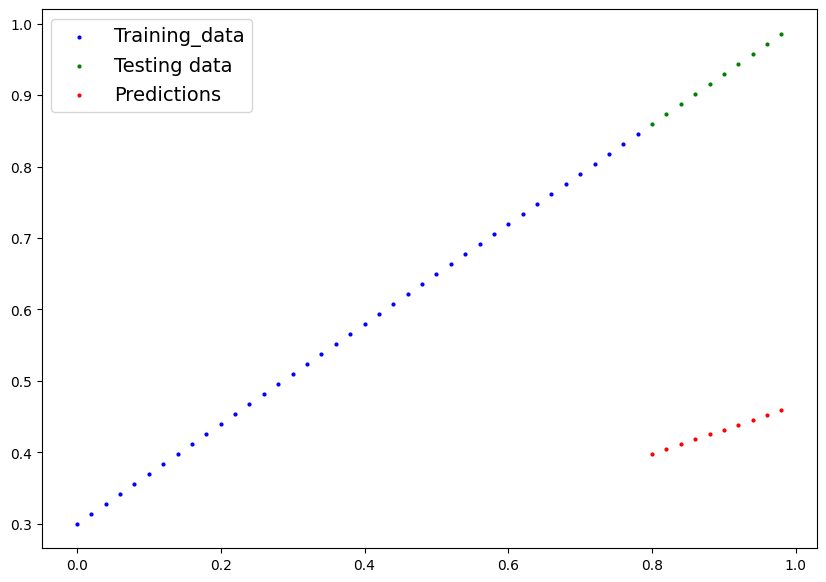

In [147]:
plot_predictions(predictions=y_preds)

## 3.Train model
the whole idea of training is for a model to move from some unkown parameters (these may be random) to some known parameters.

Or in other words from a poor representation of data to a better representation of the data.

One way to measure how poor or how wrong your model's prediction are is to use loss function(cost).

Things we need to train:

* Loss fucntion is a function to measure how wrong your model's prediction is from the idealoutputs,lower is better.

* Optimizer takes into account the loss of a model and adjusts the model's parameters(eg:weight&bias) to improve the loss fucntion.

 * Inside the optimizer you'll often have to set two parameters:
   * params-the model parameters you'd like to optimize,for example params=model_0.parameters().
   * lr(learning rate)- the learning rate is a hyperparameter that defines how big/small the optimizer changes the parameters with each step(a small lr results in small changes,a large lr results in large changes)


And specifically for PyTorch ,we need:
* A training loop
* A testing loop

In [148]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [149]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [150]:
# Setup a loss function
loss_fn=nn.L1Loss()

#Set an optimizer(stochastic gradient descent)
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.01)

### Bilding a training loop (and a testing loop) in PyTorch

A couple of things we need in a training loop:
0. Loop throgh the data
1. Forward pas(this involves data moving throughout mofrl's forward() functions)- to make predictions on data-also called forward propagation
2. Calculate the loss( compare forward pass predictions to ground trth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of eeach of the parameters of our model with respect to the loss
5. Optimizer step- use the optimizer to adjust our model's parameter to try and improve the loss(** gradient descent**)

In [151]:
torch.manual_seed(42)
epochs = 200
#track different values
epoch_count=[]
loss_values=[]
test_loss_values=[]
# Training loop
for epoch in range(epochs):
    # Set the model to training mode
    model_0.train()

    # 1. Forward pass
    y_pred = model_0(X_train)

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train)
    #print(f"loss:{loss}")

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Perform backpropagation
    loss.backward()

    # 5. Perform optimizer step (gradient descent)
    optimizer.step()

    # Testing (outside training mode)
    model_0.eval()
    with torch.inference_mode():
        test_pred = model_0(X_test)
        test_loss = loss_fn(test_pred, y_test)

    # Print every 10 epochs
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"epoch:{epoch} | loss:{loss} | testloss:{test_loss}")
        print(model_0.state_dict())


epoch:0 | loss:0.31288138031959534 | testloss:0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
epoch:10 | loss:0.1976713240146637 | testloss:0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
epoch:20 | loss:0.08908725529909134 | testloss:0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
epoch:30 | loss:0.053148526698350906 | testloss:0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
epoch:40 | loss:0.04543796554207802 | testloss:0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
epoch:50 | loss:0.04167863354086876 | testloss:0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
epoch:60 | loss:0.03818932920694351 | testloss:0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788]))])
epoch:70 | loss:0.0347

In [152]:
import numpy as np
np.array(torch.tensor(loss_values).numpy()), test_loss_values

(array([0.31288138, 0.19767132, 0.08908726, 0.05314853, 0.04543797,
        0.04167863, 0.03818933, 0.0347609 , 0.03132383, 0.0278874 ,
        0.02445896, 0.02102021, 0.01758547, 0.01415539, 0.01071659,
        0.00728353, 0.00385178, 0.00893248, 0.00893248, 0.00893248],
       dtype=float32),
 [tensor(0.4811),
  tensor(0.3464),
  tensor(0.2173),
  tensor(0.1446),
  tensor(0.1136),
  tensor(0.0992),
  tensor(0.0889),
  tensor(0.0806),
  tensor(0.0723),
  tensor(0.0647),
  tensor(0.0565),
  tensor(0.0482),
  tensor(0.0406),
  tensor(0.0323),
  tensor(0.0241),
  tensor(0.0165),
  tensor(0.0082),
  tensor(0.0050),
  tensor(0.0050),
  tensor(0.0050)])

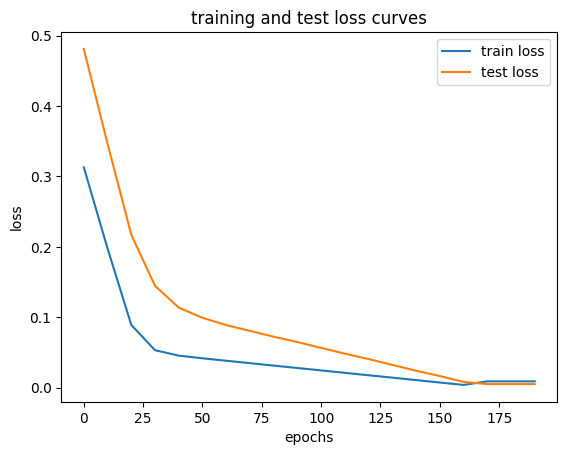

In [153]:
#plot the loss curves
plt.plot(epoch_count,np.array(torch.tensor(loss_values).cpu().numpy()),label="train loss")
plt.plot(epoch_count,test_loss_values,label="test loss")
plt.title("training and test loss curves")
plt.ylabel("loss")
plt.xlabel("epochs")
plt.legend()


In [154]:



with torch.inference_mode():
  y_preds_new=model_0(X_test)

In [155]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [156]:
weight ,bias

(0.7, 0.3)

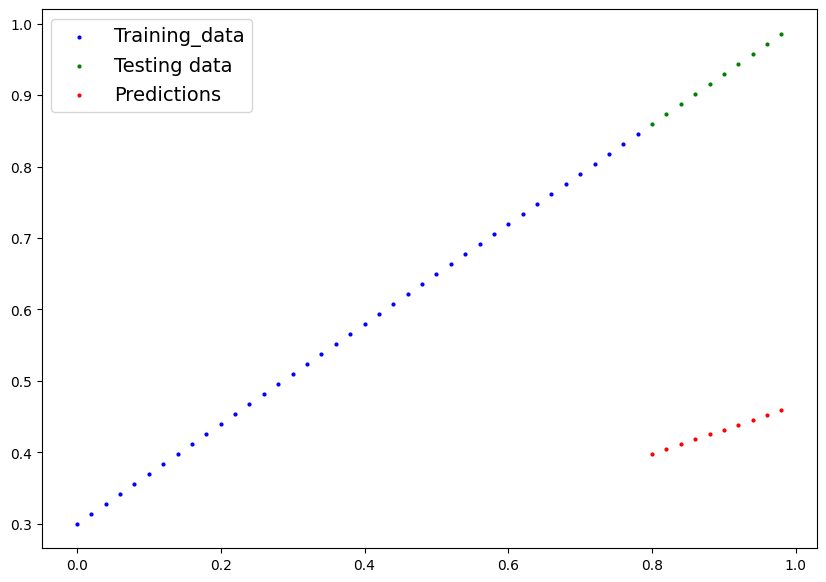

In [157]:
plot_predictions(predictions=y_preds)

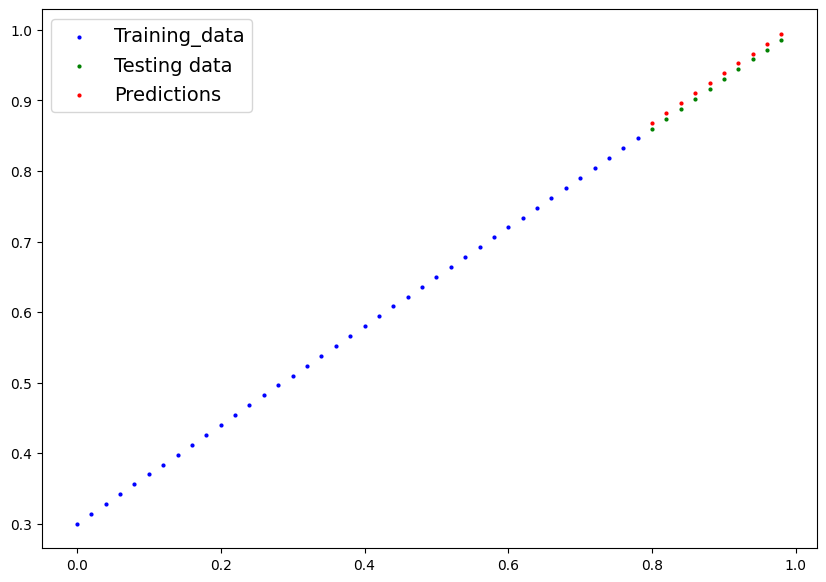

In [158]:
plot_predictions(predictions=y_preds_new)

In [159]:
 model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

## Putting it all together
Let's go back through the steps above and see it all in one place.

In [163]:
#Import PyTorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt
#Check PyTorch version
torch.__version__

'2.5.1+cu121'

Create device-agnostic code.

This means if we've got access to a GPU ,our code will use it (for potentially faster computing).

If no GPU is available ,the code will default to using CPU.

In [164]:
#Setup device agnostic code
device="cuda"if torch.cuda.is_available() else"cpu"
print(f"using device:{device}")

using device:cpu


# Data

In [165]:
#Create some data using the linear regression formula of y=weight *X +bias
weight=0.7
bias=0.3
#Create range values
start=0
end=1
step=0.02
#Create X and Y (features and labels)
X=torch.arange(start,end,step).unsqueeze(dim=1)
y=weight*X+bias
X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [166]:
#Split data
train_split=int(0.8*len(X))
X_train,y_train=X[:train_split],y[:train_split]
X_test,y_test=X[train_split:],y[train_split:]
len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

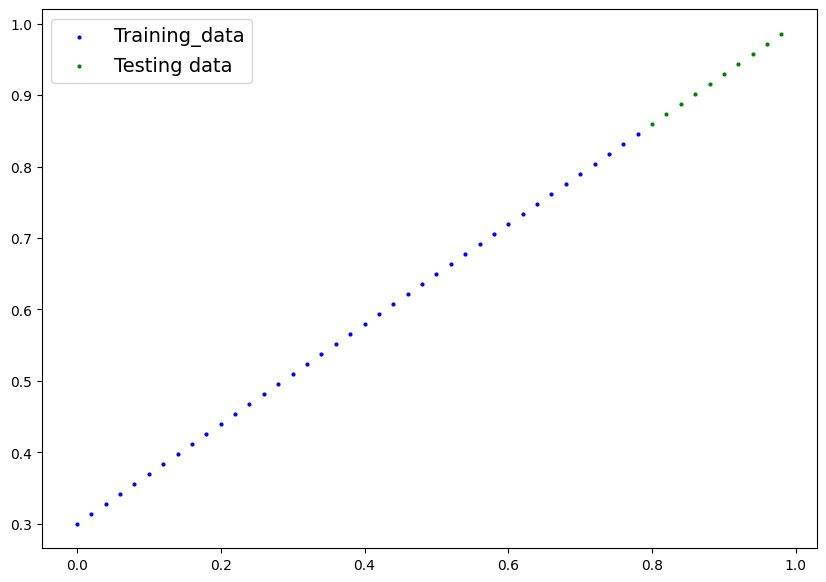

In [167]:
#Plot the data
#Note: if you don;t have plot_predcitions() function loaded ,this will error
plot_predictions(X_train,y_train,X_test,y_test)

# Building a model


In [168]:
from torch import nn
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    #Use nn.Linear() for creating the model parameters
    self.linear_layer=nn.Linear(in_features=1,out_features=1)
    def forward(self,x:torch.Tensor)->torch.Tensor:
      return self.linear_layer(x)
       #Set the mannual seed
torch.manual_seed(42)
model_1=LinearRegressionModel()
model_1,model_1.state_dict()


(LinearRegressionModel(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [169]:
#Set the model to use the target device
next(model_1.parameters()).device


device(type='cpu')

In [170]:
model_1.to (device)
next(model_1.parameters()).device

device(type='cpu')

In [171]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [172]:
# setup the lossfunction
loss_fn=nn.L1Loss()
optimizer=torch.optim.SGD(params=model_1.parameters(),lr=0.01)

In [173]:
#Let's write a training loop
torch.manual_seed(42)
epochs=200
for epoch in range(epochs):
  model_1.train()
  y_pred=model_1(X_train)
  loss=loss_fn(y_pred,y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model_1.eval()
  with torch.inference_mode():
    test_pred=model_1(X_test)
    test_loss=loss_fn(test_pred,y_test)
    if epoch %10 ==0:
     print(f"Epoch:{epoch} | Loss:{loss}| Test_Loss:{test_loss}")


NotImplementedError: Module [LinearRegressionModel] is missing the required "forward" function